In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics  

#### Reinserire percorso dataset!!!

In [2]:
df = pd.read_csv(r'C:\Users\Mario\Documents\UNIPI\DataMining1\Project\Train_HR_Employee_Attrition.csv')
#df = pd.read_csv(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/UniPi/Data Mining/DatasetProject1/Train_HR_Employee_Attrition.csv')

# Data Understanding

## Data Semantics

In [3]:
df.head()
# df.tail() per gli ultimi 5

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,10.0,2,2,1


###### Attributi, numero di valori non nulli e data type:

In [4]:
# df.columns for array of just columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

In [5]:
numberOfRecords = len(df) * 33
numberOfRecords

38808

## Distribution of the variables and statistics

In [6]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,...,1176.000000,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,...,2.702381,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,...,1.092268,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###### Per visualizzare la distribuzione delle variabili dividiamo gli attributi in base al data type (se un attributo è di tipo 'object' è una stringa, perciò è categorico o binario):

In [7]:
dfNonCategorical = df.select_dtypes(exclude=['object'])
dfNonCategorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   DailyRate                 1176 non-null   int64  
 2   DistanceFromHome          1176 non-null   int64  
 3   Education                 1176 non-null   int64  
 4   EnvironmentSatisfaction   1176 non-null   int64  
 5   HourlyRate                1176 non-null   int64  
 6   JobInvolvement            1176 non-null   int64  
 7   JobLevel                  1176 non-null   int64  
 8   JobSatisfaction           1176 non-null   int64  
 9   MonthlyIncome             963 non-null    float64
 10  MonthlyRate               1176 non-null   int64  
 11  NumCompaniesWorked        1176 non-null   int64  
 12  PercentSalaryHike         1176 non-null   int64  
 13  PerformanceRating         1038 non-null   float64
 14  Relation

In [8]:
dfCategorical = df.select_dtypes(include=['object'])
dfCategorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1176 non-null   object
 1   BusinessTravel  1069 non-null   object
 2   Department      1176 non-null   object
 3   EducationField  1176 non-null   object
 4   Gender          1117 non-null   object
 5   JobRole         1176 non-null   object
 6   MaritalStatus   1176 non-null   object
 7   Over18          804 non-null    object
 8   OverTime        1176 non-null   object
dtypes: object(9)
memory usage: 82.8+ KB


###### Visualizziamo i grafici degli attributi numerici:

<ipython-input-9-e3f174cf78b9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


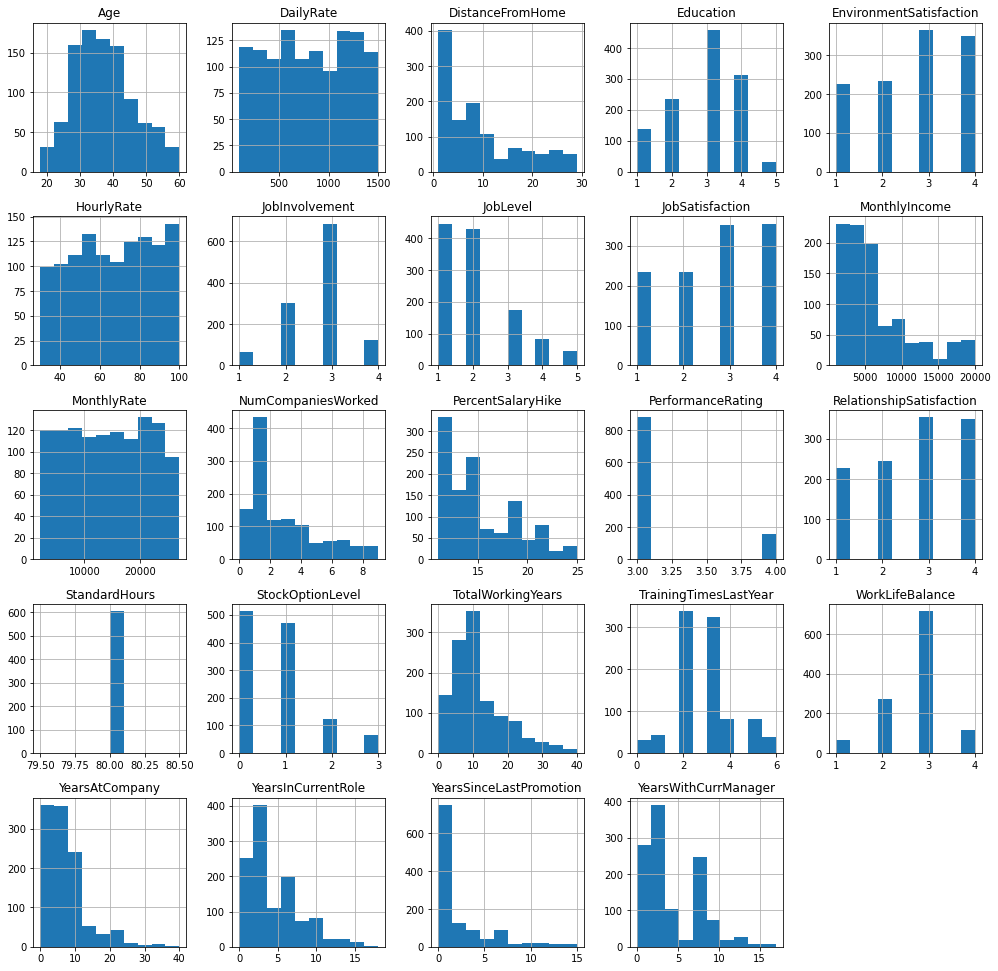

In [9]:
fig = plt.figure(figsize = (17,17))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

# Capisce automaticamente se fare l'istogramma o il bar chart

###### Visualizziamo i barchart degli attributi binari e categorici:

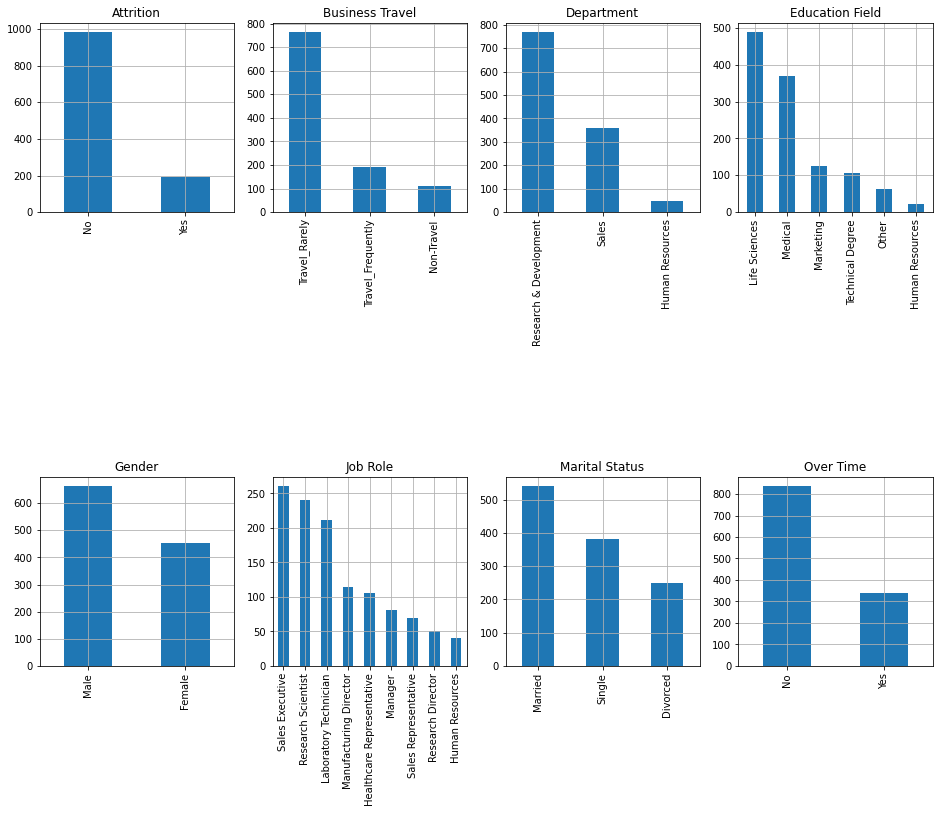

In [10]:
# Set up a grid of plots
fig = plt.figure(figsize=(16, 16)) 
fig_dims = (4,4)

# Plot Attrition
plt.subplot2grid(fig_dims, (0, 0))
df['Attrition'].value_counts().plot(kind='bar', title='Attrition')
plt.grid()

# Plot Business Travel
plt.subplot2grid(fig_dims, (0, 1))
df['BusinessTravel'].value_counts().plot(kind='bar', title='Business Travel')
plt.grid()

# Plot Department
plt.subplot2grid(fig_dims, (0, 2))
df['Department'].value_counts().plot(kind='bar', title='Department')
plt.grid()

# Plot Education Field
plt.subplot2grid(fig_dims, (0, 3))
df['EducationField'].value_counts().plot(kind='bar', title='Education Field')
plt.grid()

# Plot Gender
plt.subplot2grid(fig_dims, (2, 0))
df['Gender'].value_counts().plot(kind='bar', title='Gender')
plt.grid()

# Plot Job Role
plt.subplot2grid(fig_dims, (2, 1))
df['JobRole'].value_counts().plot(kind='bar', title='Job Role')
plt.grid()

# Plot Marital Status
plt.subplot2grid(fig_dims, (2, 2))
df['MaritalStatus'].value_counts().plot(kind='bar', title='Marital Status')
plt.grid()

# Plot Over18
#inutile

# Plot Over Time
plt.subplot2grid(fig_dims, (2, 3))
df['OverTime'].value_counts().plot(kind='bar', title='Over Time')
plt.grid()
plt.show()

## Assessing data quality (missing values, outliers)

In [11]:
df.isna().sum()

Age                         176
Attrition                     0
BusinessTravel              107
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       59
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               213
MonthlyRate                   0
NumCompaniesWorked            0
Over18                      372
OverTime                      0
PercentSalaryHike             0
PerformanceRating           138
RelationshipSatisfaction      0
StandardHours               570
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear       233
WorkLifeBalance               0
YearsAtCompany               60
YearsInCurrentRole            0
YearsSin

###### Rimpiazziamo i missing values. Quando ha senso facciamo il groupby per JobRole:

Per la media
df.groupby('JobRole').mean()

Per la moda
df.groupby(['JobRole']).agg(lambda x:x.value_counts().index[0])

In [12]:
#MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('JobRole')['MonthlyIncome'].transform('mean'))

#Age
df['Age'] = df['Age'].fillna(df.groupby('JobRole')['Age'].transform('mean'))

#Over18
df["Over18"].fillna("Y", inplace = True) 

#Gender
df["Gender"].fillna("Male", inplace = True)

#BusinessTravel
df["BusinessTravel"].fillna("Travel_Rarely", inplace = True)

#StandardHours
df["StandardHours"].fillna(float("80.0"), inplace = True)

#PerformanceRating
df['PerformanceRating'] = df.groupby(['JobRole'], sort=False)['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0])) 

#TRAININGLASTYEAR
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df.groupby('JobRole')['TrainingTimesLastYear'].transform('mean'))

#YEARS AT COMPANY
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df.groupby('JobRole')['YearsAtCompany'].transform('mean'))

df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,37.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,3,80.0,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,80.0,0,12,1.0,3,3.0,7,0,7
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,3.0,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,...,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,...,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,Travel_Rarely,583,Sales,4,1,Marketing,3,Male,...,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,...,4,80.0,0,15,2.0,3,10.0,4,0,1


###### Il dataset non presenta più missing values

In [13]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

###### Creiamo i boxplots per individuare gli attributi con outliers

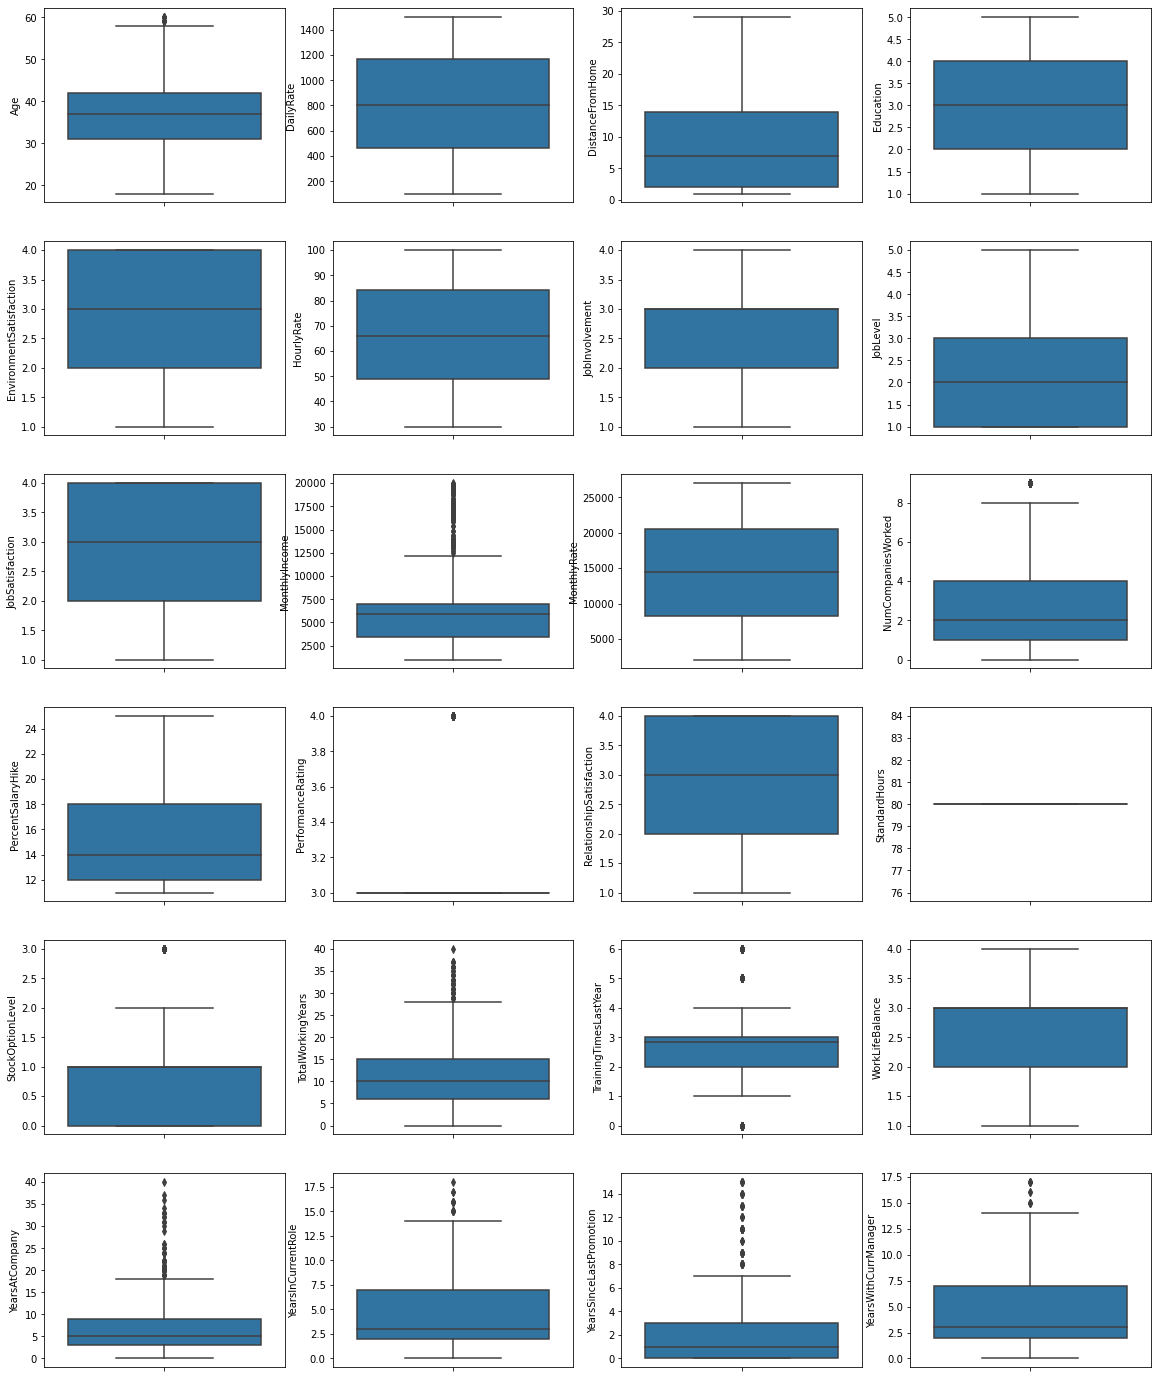

In [14]:
fig = plt.figure(figsize = (25, 25)) 
fig_dims = (6,5)

plt.subplot2grid(fig_dims, (0, 0))
sns.boxplot(y = df['Age'])

plt.subplot2grid(fig_dims, (0, 1))
sns.boxplot(y = df['DailyRate'])

plt.subplot2grid(fig_dims, (0, 2))
sns.boxplot(y = df['DistanceFromHome'])

plt.subplot2grid(fig_dims, (0, 3))
sns.boxplot(y = df['Education'])

plt.subplot2grid(fig_dims, (1, 0))
sns.boxplot(y = df['EnvironmentSatisfaction'])

plt.subplot2grid(fig_dims, (1, 1))
sns.boxplot(y = df['HourlyRate'])

plt.subplot2grid(fig_dims, (1, 2))
sns.boxplot(y = df['JobInvolvement'])

plt.subplot2grid(fig_dims, (1, 3))
sns.boxplot(y = df['JobLevel'])

plt.subplot2grid(fig_dims, (2, 0))
sns.boxplot(y = df['JobSatisfaction'])

plt.subplot2grid(fig_dims, (2, 1))
sns.boxplot(y = df['MonthlyIncome'])

plt.subplot2grid(fig_dims, (2, 2))
sns.boxplot(y = df['MonthlyRate'])

plt.subplot2grid(fig_dims, (2, 3))
sns.boxplot(y = df['NumCompaniesWorked'])

plt.subplot2grid(fig_dims, (3, 0))
sns.boxplot(y = df['PercentSalaryHike'])

plt.subplot2grid(fig_dims, (3, 1))
sns.boxplot(y = df['PerformanceRating'])

plt.subplot2grid(fig_dims, (3, 2))
sns.boxplot(y = df['RelationshipSatisfaction'])

plt.subplot2grid(fig_dims, (3, 3))
sns.boxplot(y = df['StandardHours'])

plt.subplot2grid(fig_dims, (4, 0))
sns.boxplot(y = df['StockOptionLevel'])

plt.subplot2grid(fig_dims, (4, 1))
sns.boxplot(y = df['TotalWorkingYears'])

plt.subplot2grid(fig_dims, (4, 2))
sns.boxplot(y = df['TrainingTimesLastYear'])

plt.subplot2grid(fig_dims, (4, 3))
sns.boxplot(y = df['WorkLifeBalance'])

plt.subplot2grid(fig_dims, (5, 0))
sns.boxplot(y = df['YearsAtCompany'])

plt.subplot2grid(fig_dims, (5, 1))
sns.boxplot(y = df['YearsInCurrentRole'])

plt.subplot2grid(fig_dims, (5, 2))
sns.boxplot(y = df['YearsSinceLastPromotion'])

plt.subplot2grid(fig_dims, (5, 3))
sns.boxplot(y = df['YearsWithCurrManager'])

###### Metodo grafico - Ci sono outliers in:

Age, MonthlyIncome, NumCompaniesWorked, PeformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager

Siccome è plausibile che ci siano lavoratori di 60 anni, ignoriamo gli outliers in Age:

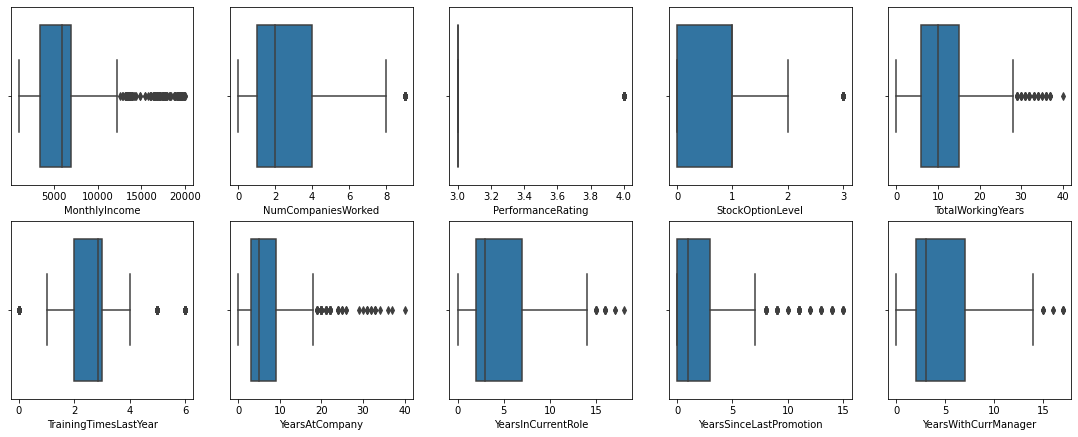

In [15]:
fig = plt.figure(figsize = (19, 19)) 
fig_dims = (5,5)

plt.subplot2grid(fig_dims, (0, 0))
sns.boxplot(x = df['MonthlyIncome'])

plt.subplot2grid(fig_dims, (0, 1))
sns.boxplot(x = df['NumCompaniesWorked'])

plt.subplot2grid(fig_dims, (0, 2))
sns.boxplot(x = df['PerformanceRating'])

plt.subplot2grid(fig_dims, (0, 3))
sns.boxplot(x = df['StockOptionLevel'])

plt.subplot2grid(fig_dims, (0, 4))
sns.boxplot(x = df['TotalWorkingYears'])

plt.subplot2grid(fig_dims, (1, 0))
sns.boxplot(x = df['TrainingTimesLastYear'])

plt.subplot2grid(fig_dims, (1, 1))
sns.boxplot(x = df['YearsAtCompany'])

plt.subplot2grid(fig_dims, (1, 2))
sns.boxplot(x = df['YearsInCurrentRole'])

plt.subplot2grid(fig_dims, (1, 3))
sns.boxplot(x = df['YearsSinceLastPromotion'])

plt.subplot2grid(fig_dims, (1, 4))
sns.boxplot(x = df['YearsWithCurrManager'])

###### Outlier detection con z-score

In [16]:
#OUTLIERS FOR AGE

"""SD AGE"""
age_std = df ['Age'].std()
age_std

"""MEAN AGE"""
age_mean = df ['Age'].mean()
age_mean

threshold = 3
outlier = [] 
for i in df ['Age']: 
    z = (i-age_mean)/age_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in Age', outlier) 
 
 
#OUTLIERS FOR DAILY RATE

"""SD DAILYRATE"""
dailyrate_std = df ['DailyRate'].std()
dailyrate_std

"""MEAN AGE"""
dailyrate_mean = df ['DailyRate'].mean()
dailyrate_mean

threshold = 3
outlier = [] 
for i in df ['DailyRate']: 
    z = (i-dailyrate_mean)/dailyrate_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in DailyRate', outlier) 
 

#OUTLIERS FOR DISTANCE FROM HOME

"""SD DistanceFromHome"""
DistanceFromHome_std = df ['DistanceFromHome'].std()
DistanceFromHome_std

"""MEAN DistanceFromHome"""
DistanceFromHome_mean = df ['DistanceFromHome'].mean()
DistanceFromHome_mean

threshold = 3
outlier = [] 
for i in df ['DistanceFromHome']: 
    z = (i-DistanceFromHome_mean)/DistanceFromHome_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in DistanceFromHome', outlier)
 
 
#OUTLIERS FOR EDUCATION

"""SD Education"""
Education_std = df ['Education'].std()
Education_std

"""MEAN Education"""
Education_mean = df ['Education'].mean()
Education_mean

threshold = 3
outlier = [] 
for i in df ['Education']: 
    z = (i-Education_mean)/Education_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in Education', outlier)
 
 
#OUTLIERS FOR HOURLYRATE

"""SD HourlyRate"""
HourlyRate_std = df ['HourlyRate'].std()
HourlyRate_std

"""MEAN HourlyRate"""
HourlyRate_mean = df ['HourlyRate'].mean()
HourlyRate_mean

threshold = 3
outlier = [] 
for i in df ['HourlyRate']: 
    z = (i-HourlyRate_mean)/HourlyRate_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in HourlyRate', outlier)
 
 
#OUTLIERS FOR MonthlyIncome

"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std

"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean

threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in MonthlyIncome', outlier)
 
 
#OUTLIERS FOR MonthlyRate

"""SD MonthlyRate"""
MonthlyRate_std = df ['MonthlyRate'].std()
MonthlyRate_std

"""MEAN MonthlyRate"""
MonthlyRate_mean = df ['MonthlyRate'].mean()
MonthlyRate_mean

threshold = 3
outlier = [] 
for i in df ['MonthlyRate']: 
    z = (i-MonthlyRate_mean)/MonthlyRate_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in MonthlyRate', outlier)
  

#OUTLIERS FOR NumCompaniesWorked

"""SD NumCompaniesWorked"""
NumCompaniesWorked_std = df ['NumCompaniesWorked'].std()
NumCompaniesWorked_std

"""MEAN NumCompaniesWorked"""
NumCompaniesWorked_mean = df ['NumCompaniesWorked'].mean()
NumCompaniesWorked_mean

threshold = 3
outlier = [] 
for i in df ['NumCompaniesWorked']: 
    z = (i-NumCompaniesWorked_mean)/NumCompaniesWorked_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in NumCompaniesWorked', outlier)
 
 
#OUTLIERS FOR PercentSalaryHike

"""SD PercentSalaryHike"""
PercentSalaryHike_std = df ['PercentSalaryHike'].std()

"""MEAN PercentSalaryHike"""
PercentSalaryHike_mean = df ['PercentSalaryHike'].mean()

threshold = 3
outlier = [] 
for i in df ['PercentSalaryHike']: 
    z = (i-PercentSalaryHike_mean)/PercentSalaryHike_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in PercentSalaryHike', outlier)
 
 
#OUTLIERS FOR PerformanceRating

"""SD PerformanceRating"""
PerformanceRating_std = df ['PerformanceRating'].std()

"""MEAN PerformanceRating"""
PerformanceRating_mean = df ['PerformanceRating'].mean()

threshold = 3
outlier = [] 
for i in df ['PerformanceRating']: 
    z = (i-PerformanceRating_mean)/PerformanceRating_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in PerformanceRating', outlier)
 
 
#OUTLIERS FOR RelationshipSatisfaction

"""SD RelationshipSatisfaction"""
RelationshipSatisfaction_std = df ['RelationshipSatisfaction'].std()

"""MEAN RelationshipSatisfaction"""
RelationshipSatisfaction_mean = df ['RelationshipSatisfaction'].mean()

threshold = 3
outlier = [] 
for i in df ['RelationshipSatisfaction']: 
    z = (i-RelationshipSatisfaction_mean)/RelationshipSatisfaction_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in RelationshipSatisfaction', outlier)
 
 
#OUTLIERS FOR StockOptionLevel

"""SD StockOptionLevel"""
StockOptionLevel_std = df ['StockOptionLevel'].std()

"""MEAN StockOptionLevel"""
StockOptionLevel_mean = df ['StockOptionLevel'].mean()

threshold = 3
outlier = [] 
for i in df ['StockOptionLevel']: 
    z = (i-StockOptionLevel_mean)/StockOptionLevel_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in StockOptionLevel', outlier)
 

#OUTLIERS FOR TotalWorkingYears

"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()

"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()

threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in TotalWorkingYears', outlier)
 

#OUTLIERS FOR TrainingTimesLastYear

"""SD TrainingTimesLastYear"""
TrainingTimesLastYear_std = df ['TrainingTimesLastYear'].std()

"""MEAN TrainingTimesLastYear"""
TrainingTimesLastYear_mean = df ['TrainingTimesLastYear'].mean()

threshold = 3
outlier = [] 
for i in df ['TrainingTimesLastYear']: 
    z = (i-TrainingTimesLastYear_mean)/TrainingTimesLastYear_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in TrainingTimesLastYear', outlier)
 
 
#OUTLIERS FOR YearsAtCompany

"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()

"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in YearsAtCompany', outlier)
 
 
#OUTLIERS FOR YearsInCurrentRole

"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()

"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in YearsInCurrentRole', outlier)
 
 
#OUTLIERS FOR YearsSinceLastPromotion

"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()

"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in YearsSinceLastPromotion', outlier)
 
 
#OUTLIERS FOR YearsWithCurrManager

"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()

"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in YearsWithCurrManager', outlier)

outlier in Age []
outlier in DailyRate []
outlier in DistanceFromHome []
outlier in Education []
outlier in HourlyRate []
outlier in MonthlyIncome [19545.0, 19502.0, 19431.0, 19740.0, 19419.0, 19845.0, 19999.0, 19926.0, 19833.0, 19406.0, 19537.0, 19658.0, 19859.0, 19586.0, 19665.0, 19717.0, 19517.0]
outlier in MonthlyRate []
outlier in NumCompaniesWorked []
outlier in PercentSalaryHike []
outlier in PerformanceRating []
outlier in RelationshipSatisfaction []
outlier in StockOptionLevel []
outlier in TotalWorkingYears [37, 40, 35, 37, 36, 36, 36, 36, 37, 37, 35, 36, 36]
outlier in TrainingTimesLastYear []
outlier in YearsAtCompany [34.0, 31.0, 31.0, 31.0, 29.0, 32.0, 40.0, 33.0, 26.0, 32.0, 25.0, 25.0, 37.0, 36.0, 26.0, 25.0, 30.0, 33.0, 33.0, 33.0]
outlier in YearsInCurrentRole [17, 16, 18, 16, 17, 16, 16, 16, 16, 16]
outlier in YearsSinceLastPromotion [14, 14, 12, 13, 15, 15, 15, 12, 13, 14, 15, 13, 13, 13, 14, 15, 15, 12, 14, 13, 14, 12, 15, 13, 12, 15, 14, 13, 12, 14, 13]
outlier in

###### Outliers in: 
MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

Essendo outliers anche nei boxplot li rimuoviamo:

In [17]:
#OUTLIERS FOR MonthlyIncome

"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std

"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean

threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears

"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()

"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()

threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.TotalWorkingYears.isin(outlier)]


#OUTLIERS FOR YearsAtCompany

"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()

"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole

"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()

"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsInCurrentRole.isin(outlier)]
 
 
#OUTLIERS FOR YearsSinceLastPromotion

"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()

"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsSinceLastPromotion.isin(outlier)]
 
 
#OUTLIERS FOR YearsWithCurrManager

"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()

"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsWithCurrManager.isin(outlier)]

In [18]:
print('Numero outlier rimossi: ', 1176 - len(df))
len(df)

Numero outlier rimossi:  97


1079

###### Attenzione a non fare Run più volte sugli z-score, altrimenti ogni volta trova altri outlier e il dataframe si restringe ulteriormente. len(df) a questo punto dovrebbe essere 1079

## Variables transformations

In [19]:
#Convertiamo Attrition 
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1175
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1079 non-null   float64
 1   Attrition                 1079 non-null   int64  
 2   BusinessTravel            1079 non-null   int64  
 3   DailyRate                 1079 non-null   int64  
 4   Department                1079 non-null   object 
 5   DistanceFromHome          1079 non-null   int64  
 6   Education                 1079 non-null   int64  
 7   EducationField            1079 non-null   object 
 8   EnvironmentSatisfaction   1079 non-null   int64  
 9   Gender                    1079 non-null   object 
 10  HourlyRate                1079 non-null   int64  
 11  JobInvolvement            1079 non-null   int64  
 12  JobLevel                  1079 non-null   int64  
 13  JobRole                   1079 non-null   object 
 14  JobSatis

In [20]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['MaritalStatus'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,52.000000,0,1,593,Research & Development,9,4,Medical,2,Male,...,20,2.000000,2,8.0,7,2,13,0,0,1
1,36.000000,0,1,1218,Research & Development,1,1,Life Sciences,2,Male,...,21,3.000000,3,1.0,8,1,6,1,0,0
2,36.674419,0,2,530,Sales,16,3,Life Sciences,3,Male,...,7,4.000000,3,1.0,5,1,2,1,0,0
3,33.000000,0,1,953,Research & Development,5,4,Technical Degree,2,Male,...,12,1.000000,3,3.0,7,0,7,0,0,1
4,37.417582,0,1,1380,Research & Development,9,2,Life Sciences,3,Female,...,2,2.767045,3,10.0,2,2,1,0,0,1


In [21]:
#Prima creo un df solo con gli attributi numerici
num_df = df.select_dtypes(exclude=['object'])
 
#Codice per MIN-MAX SCALING - NORMALIZZAZIONE
norm_data = MinMaxScaler().fit(num_df)
norm_data = norm_data.transform(num_df)
norm_data = pd.DataFrame(num_df)
norm_data.columns = ['Age', 'Attrition' , 'BusinessTravel', 'DailyRate' , 'DistanceFromHome' , 'Education', 'EnvironmentSatisfaction' , 'HourlyRate', 'JobInvolvement' , 'JobLevel', 'JobSatisfaction', 'MonthlyIncome' , 'MonthlyRate' , 'NumCompaniesWorked' , 'OverTime' , 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single'] 
 
#Codice per ZSCORE - STANDARDIZZAZIONE 
stand_data = StandardScaler().fit(num_df)
stand_data = stand_data.transform(num_df)
stand_data = pd.DataFrame(num_df)
stand_data.columns = ['Age', 'Attrition' , 'BusinessTravel', 'DailyRate' , 'DistanceFromHome' , 'Education', 'EnvironmentSatisfaction' , 'HourlyRate', 'JobInvolvement' , 'JobLevel', 'JobSatisfaction', 'MonthlyIncome' , 'MonthlyRate' , 'NumCompaniesWorked' , 'OverTime' , 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']
df = stand_data

## Pairwise correlations and eventual elimination of redundant variables 

In [22]:
#Cancelliamo MaritalStatus (fatto con standardizzazione)

#Cancelliamo Over18 (fatto con standardizzazione)

#Cancelliamo MaritalStatus
df = df.drop(columns = 'StandardHours')

#Cancelliamo i Rate
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')

#Cancelliamo EducationField (fatto con standardizzazione)

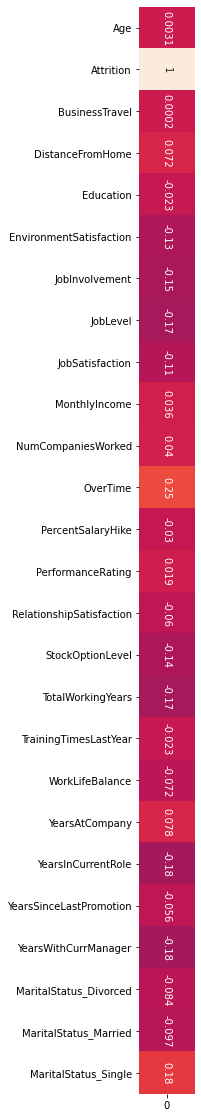

In [23]:
seriesAttr = df.corrwith(df['Attrition'])
dfAttr = seriesAttr.to_frame()

plt.figure(figsize=(1,20))

heatmap = sns.heatmap(dfAttr, vmin=-1, vmax=1, annot=True, square=False, cbar=False, annot_kws={'rotation': 270})

plt.show()
#da ruotare sul report

In [24]:
#Cancelliamo colonne 

#df = df.drop(columns = 'Age')
#df = df.drop(columns = 'MonthlyIncome')
#df = df.drop(columns = 'NumCompaniesWorked')
#df = df.drop(columns = 'PercentSalaryHike')
#df = df.drop(columns = 'PerformanceRating')
#df = df.drop(columns = 'RelationshipSatisfaction')
#df = df.drop(columns = 'TrainingTimesLastYear')
#df = df.drop(columns = 'YearsSinceLastPromotion')
df = df.drop(columns = 'BusinessTravel')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')

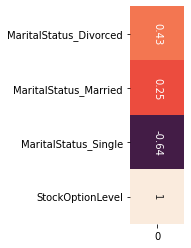

In [25]:
#Faccio un dataframe con i 3 MaritalStatus e StockOptionLevel
dfMS = pd.DataFrame(df, columns=('MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'StockOptionLevel'))

#Correlazione tra StockOptionLeve e MaritalStatus
series_dfMS = dfMS.corrwith(df['StockOptionLevel'])
corrMS = series_dfMS.to_frame()

#Heatmap
heatmap = sns.heatmap(corrMS, vmin=-1, vmax=1, annot=True, square=True, cbar=False, annot_kws={'rotation': 270})
plt.show()